In [3]:
# import os
# import sys
# sys.path.append('/Users/nvalett/Documents/Natalie/Species Dist Research/Thesis/EcoLinker')
# from EcoLinker.restorationOptimizer import restorationOptimizer
# import ecoscape_connectivity

# DATA_PATH="/Users/nvalett/Documents/Natalie/Species Dist Research/Thesis/EcoLinker/tests/assets"

# HABITAT_PATH = os.path.join(DATA_PATH, "habitat_small.tif")
# TERRAIN_PATH = os.path.join(DATA_PATH, "terrain_small.tif")
# PERMEABILITY_PATH = os.path.join(DATA_PATH, "terrain_permeability.csv")
# transmission_d = ecoscape_connectivity.util.read_transmission_csv(PERMEABILITY_PATH)

# CONNECTIVITY_PATH = os.path.join(DATA_PATH, "Outputs/connectivity.tif")
# FLOW_PATH = os.path.join(DATA_PATH, "Outputs/flow.tif")


{0: 0.0, 100: 0.0, 104: 1.0, 105: 1.0, 107: 3.4359695178156634e-10, 108: 6.8653763338523e-05, 201: 0.0011095463690656002, 300: 0.0, 303: 0.0, 304: 0.11144914163956406, 305: 0.00951011800664136, 308: 1.0, 400: 0.0, 401: 4.623440583172758e-06, 404: 0.9, 405: 0.9, 500: 0.0006802013619974261, 501: 2.199020491402025e-06, 502: 2.1990204914020246e-08, 505: 0.001716344083463075, 506: 8.24976281227541e-07, 507: 0.0, 510: 0.0, 511: 7.91647376904729e-07, 513: 1.1163464963383093e-06, 514: 0.0, 515: 0.0, 600: 5.226109636597626e-07, 801: 6.061050229426832e-07, 802: 2.889650364482974e-07, 803: 7.270511499697945e-07, 900: 0.0004923088048851944, 909: 6.896128261036751e-05, 1101: 0.0, 1102: 0.0, 1103: 3.4359695178156634e-10, 1105: 0.0, 1106: 0.0, 1200: 2.6006853280346763e-06, 1206: 5.4975512285050615e-09, 1401: 0.07895695808538851, 1402: 1.0, 1403: 0.6222293492858122, 1405: 0.0}


In [5]:
import os
import sys
sys.path.append('/Users/nvalett/Documents/Natalie/Species Dist Research/Thesis/EcoLinker')
from EcoLinker.restorationOptimizer import restorationOptimizer
import ecoscape_connectivity

DATA_PATH="/Users/nvalett/Documents/Natalie/Species Dist Research/Thesis/EcoLinker/tests/assets/paper_repro"

HABITAT_PATH = os.path.join(DATA_PATH, "habitat.tif")
TERRAIN_PATH = os.path.join(DATA_PATH, "terrain.tif")
PERMEABILITY_PATH = os.path.join(DATA_PATH, "transmission_refined_1.csv")
transmission_d = ecoscape_connectivity.util.read_transmission_csv(PERMEABILITY_PATH)

CONNECTIVITY_PATH = os.path.join(DATA_PATH, "repopulation_spreads_15_hop_3_sims_10000_texp_1.tif")
FLOW_PATH = os.path.join(DATA_PATH, "gradient_spreads_15_hop_3_sims_1000_texp_1.tif")

In [6]:

# compute connectivity - not needed unless output is needed
ecoscape_connectivity.compute_connectivity(HABITAT_PATH, TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, transmission_d)

Habitat:


<Figure size 500x500 with 0 Axes>

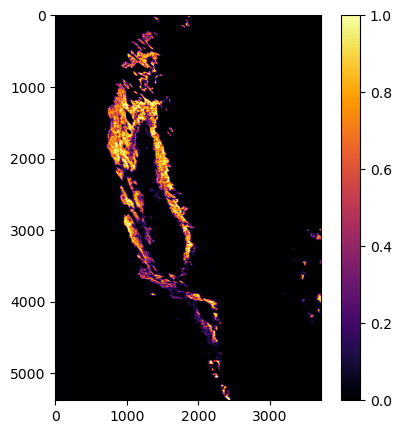

terrain:


<Figure size 500x500 with 0 Axes>

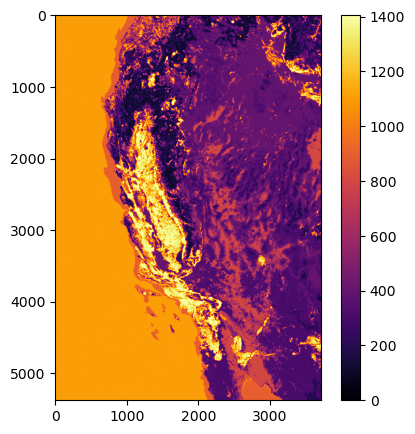

permeability:


<Figure size 500x500 with 0 Axes>

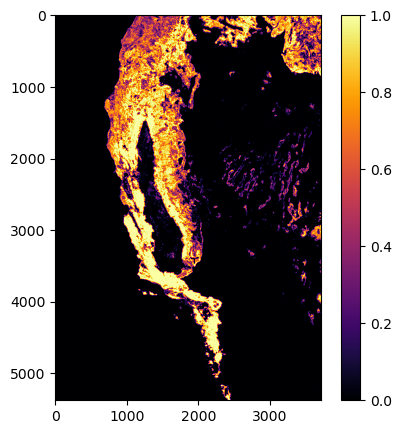

connectivity:


<Figure size 500x500 with 0 Axes>

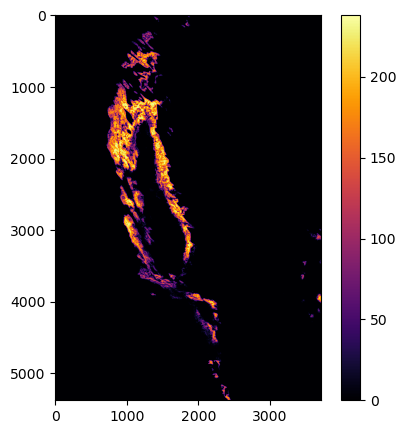

gradient:


<Figure size 500x500 with 0 Axes>

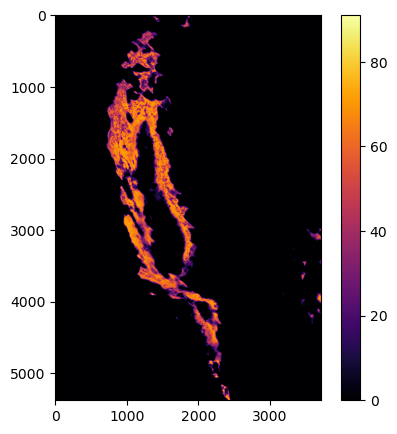

sensitivity:


<Figure size 500x500 with 0 Axes>

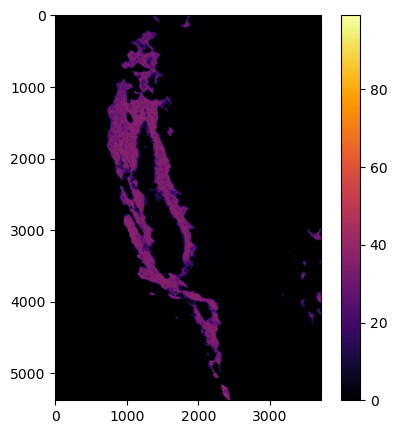

In [3]:
from scgt import Tile, GeoTiff

optimizer = restorationOptimizer(HABITAT_PATH, TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, PERMEABILITY_PATH, 10)

raw_terrain = optimizer.terrain_geotiff.get_all_as_tile().m
permeability = ecoscape_connectivity.util.dict_translate(raw_terrain, optimizer.permeability_dict)

with optimizer.connectivity_geotiff.clone_shape("permeability.tif") as permeability_tif:
    permeability_tile = Tile(permeability_tif.width, permeability_tif.height, 0, 0, 0, 0, permeability)
    permeability_tif.set_tile(permeability_tile)

sensitivity_tif = optimizer.get_sensitivity_of_grad("sensitivity.tif")
raw_sensitivity = sensitivity_tif.get_all_as_tile().m
raw_connectivity = optimizer.connectivity_geotiff.get_all_as_tile().m


print("Habitat:")
optimizer.habitat_geotiff.draw_geotiff()

print("terrain:")
optimizer.terrain_geotiff.draw_geotiff()

print("permeability:")
permeability_tif = GeoTiff.from_file("permeability.tif")
permeability_tif.draw_geotiff()

print("connectivity:")
optimizer.connectivity_geotiff.draw_geotiff()

print("gradient:")
optimizer.flow_geotiff.draw_geotiff()

print("sensitivity:")
sensitivity_tif.draw_geotiff()


death:


<Figure size 500x500 with 0 Axes>

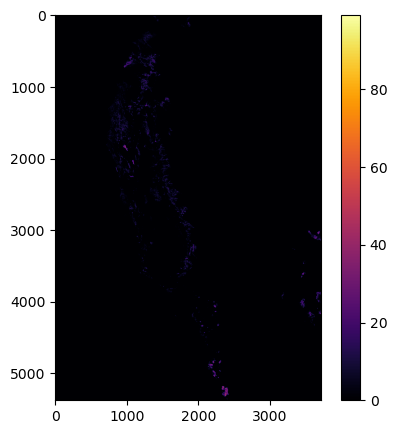

In [4]:
death_tif = optimizer.get_death_layer("death.tif")
print("death:")
death_tif.draw_geotiff()